In [2]:
import sys
import json

import matplotlib

sys.path.insert(1, '_common')
import matplotlib.pyplot as plt
import numpy as np
import metrics
import metrics_2
import importlib

In [3]:
def add_result(result_dict: dict, name: str, qubits: [int], depths:[int], rates: [float]):
    metrics = {}
    metrics['avg_create_times'] = [0] * len(qubits)
    metrics['avg_elapsed_times'] = [0] * len(qubits)
    metrics["avg_exec_creating_times"] = []
    metrics["avg_exec_running_times"] = []
    metrics["avg_exec_times"] = [0] * len(qubits)
    metrics["avg_exec_validating_times"] =  []
    metrics["avg_hf_fidelities"] = [0] * len(qubits)
    metrics["avg_depths"] = [100] * len(qubits)
    metrics["avg_tr_n2qs"] = [0] * len(qubits)
    metrics["avg_tr_xis"] = [0] * len(qubits)
    metrics["avg_xis"] = [0] * len(qubits)

    metrics["groups"] = [str(qubit) for qubit in qubits]
    metrics['avg_tr_depths'] = depths
    metrics['avg_fidelities'] = rates

    result = {}
    result['group_metrics'] = metrics

    # Add stubs
    result['backend_id'] = 'simulator'
    result['circuit_metrics'] = None
    result['start_time'] = 0
    result['end_time'] = 0

    result_dict[f'Benchmark Results - {name} - Qiskit'] = result

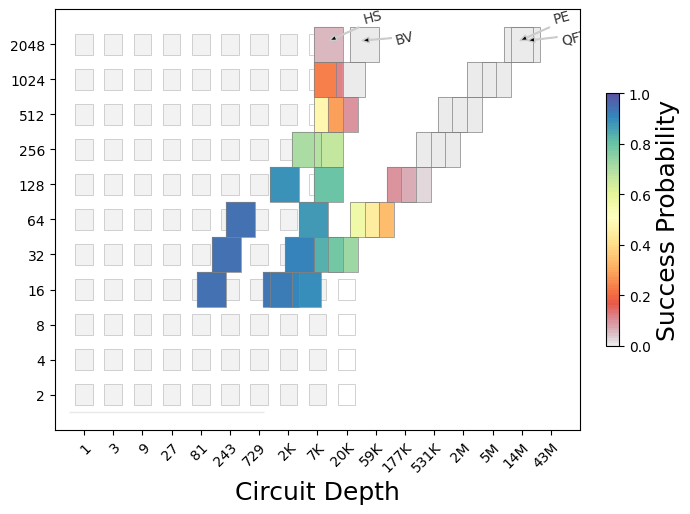

In [148]:
# No QEC
importlib.reload(metrics_2)

d = {}

add_result(d, 'BV', [2**(i+4) for i in range(8)],
           [107.0, 195.0, 371.0, 1746.0, 4488.0, 17826.0, 23190.0, 35274.0],
           [0.9986942456871947, 0.9974169085258735, 0.994867477126657, 0.9336985081684664, 0.7403449513282322, 0.09926638354645621, 0.0052814101018166925, 5.65878056114034e-07]
)
add_result(d, 'HS', [2**(i+4) for i in range(8)],
           [1530.0, 3138.0, 6354.0, 10334.0, 10334.0, 10334.0, 10334.0, 10334.0],
           [0.9801000979644457, 0.959368022611008, 0.9192102332440996, 0.8402767038065911, 0.7051622079544972, 0.4966179816195407, 0.24631409453028327, 0.06059306344134428])
add_result(d, 'QFT', [2**(i+4) for i in range(8)],
           [4391.0, 17983.0, 71411.0, 243187.0, 699472.0, 1661873.0, 5408729.0, 17973577.0],
           [0.937614682406951, 0.7672469850319411, 0.349250346980412, 0.023317945770490133, 2.443690823722053e-06, 9.646644300458013e-21, 1.3956672644261391e-83, 5e-324]
           )
add_result(d, 'PE', [2**(i+4) for i in range(8)],
           [2145.0, 8961.0, 35334.0, 145740.0, 487000.0, 1131109.0, 2775497.0, 13501596.0],
           [0.9691797784534071, 0.8764467648698594, 0.5936027121596242, 0.10353475905186144, 0.00010777645852752162, 5.230827474873273e-17, 5.249318734449995e-65, 5e-324]
           )


with open(f'__data/DATA-NO_QEC.json', 'w') as f:
    json.dump(d, f)

metrics_2.plot_all_app_metrics('NO_QEC')

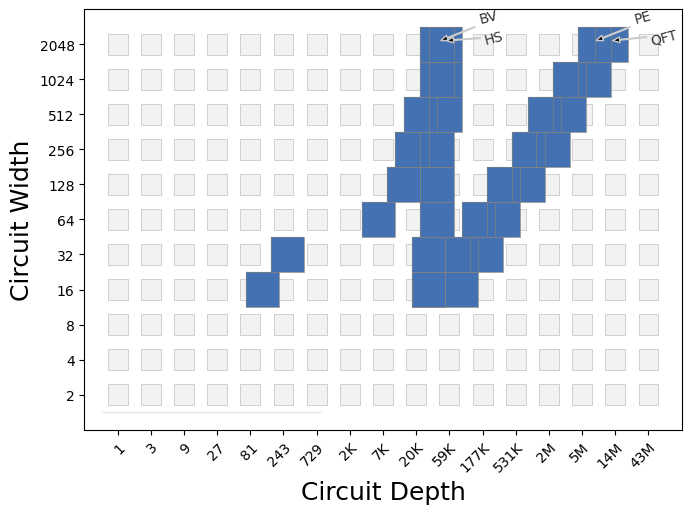

In [105]:
importlib.reload(metrics_2)

d = {}

add_result(d, 'BV', [2**(i+4) for i in range(8)],
           [130.0, 260.0, 5135.0, 11765.0, 16315.0, 20345.0, 34385.0, 44590.0],
           [0.9999999997111713, 0.9999999958955552, 0.9999998590362654, 0.9999990460111052, 0.9999982385207633, 0.9999968519860241, 0.9999898908952615, 0.9999751370063912]
)
add_result(d, 'HS', [2**(i+4) for i in range(8)],
           [26447.0, 30277.0, 37362.0, 38105.0, 41758.0, 50293.0, 51515.0, 53695.0],
           [0.9999985520396495, 0.9999965612753203, 0.9999918637788193, 0.9999843189292879, 0.9999647174455744, 0.9999339930742278, 0.999851749739114, 0.999735848058304]
           )
add_result(d, 'QFT', [2**(i+4) for i in range(8)],
           [91170.0, 181478.0, 395072.0, 802386.0, 1613622.0, 3391974.0, 6636345.0, 13182584.0],
           [0.9999976607456452, 0.9999893387292446, 0.9999677438438376, 0.9999110421197105, 0.9997402324992855, 0.9991169116043539, 0.996878518700934, 0.9905731885260654]
           )
add_result(d, 'PE', [2**(i+4) for i in range(8)],
           [29075.0, 86355.0, 164570.0, 346801.0, 709448.0, 1422475.0, 2810821.0, 7624161.0],
           [0.9999989998360469, 0.9999959802221856, 0.9999866343202369, 0.999960046421292, 0.9998702972974471, 0.999550769599133, 0.9983138232296032, 0.9936768381694399]

           )
with open(f'__data/DATA-QEC.json', 'w') as f:
    json.dump(d, f)

metrics_2.plot_all_app_metrics('QEC')

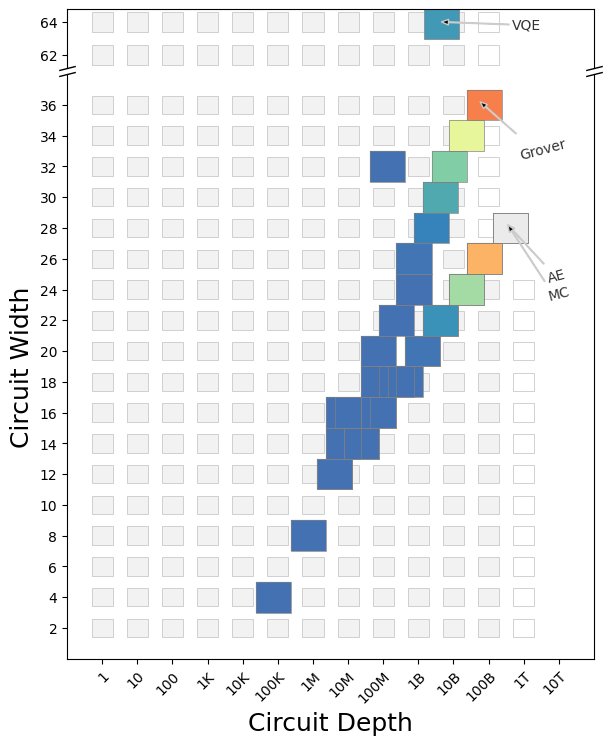

In [136]:
# (19,5) code
importlib.reload(metrics)
d = {}

add_result(d, 'AE', list(range(12, 30, 2)),
           [4751733.0, 18975871.0, 85709406.0, 304650852.0, 1200093670.0, 5484770900.0, 24411378000.0, 80915544000.0, 351078640000.0],
           [0.9999630272357538, 0.9998240134027113, 0.9991750042191725, 0.9970980687227871, 0.9867074686627908, 0.9392128004869819, 0.7609180860103967, 0.36302795096167634, 0.009591014178381428]
           )
add_result(d, 'Grover', list(range(12, 38, 2)),
           [3642229.0, 6950549.0, 15524845.0, 56371565.0, 90906954.0, 185982928.0, 579434665.0, 921976790.0, 1911749370.0, 5613974050.0, 9289756600.0, 19331837000.0, 57542149000.0],
           [0.9999641202875174, 0.9999176615944457, 0.9997974490987126, 0.9992433791907718, 0.9986103899617353, 0.9969186226624814, 0.9900614179443411, 0.9825849388207167, 0.9621433408504032, 0.8889722957390813, 0.8099858025411727, 0.6312918035434877, 0.24366417139925076]
)
add_result(d, 'MC', list(range(12, 30, 2)),
           [5410014.0, 22577994.0, 86312564.0, 339972916.0, 1380508420.0, 5582841800.0, 22122597000.0, 89618366000.0, 353492640000.0],
           [0.9999467440315043, 0.9997698792489127, 0.9990798665772264, 0.9961657595766343, 0.9836119560237699, 0.9340647294397635, 0.7502032988210009, 0.3074552444365164, 0.00790145512023032]
)
add_result(d, 'VQE', [4, 8, 16, 32, 64],
           [57923.0, 645262.0, 8558040.0, 166018919.0, 4561371945.0],
           [0.9999998710581591, 0.9999978513576784, 0.9999464342560189, 0.9981064886176881, 0.9263089765072453]
)
with open(f'__data/DATA-QEC.json', 'w') as f:
    json.dump(d, f)

metrics.max_depth_log=15
metrics.plot_all_app_metrics('QEC')

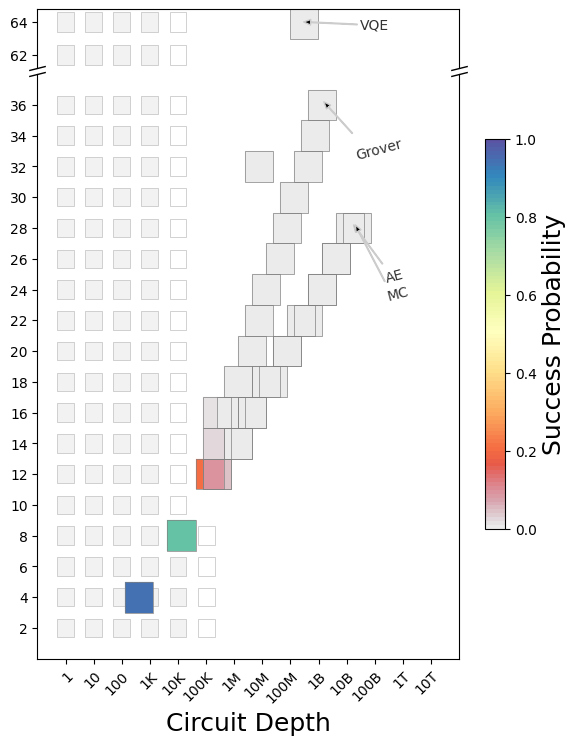

In [7]:
importlib.reload(metrics)
d = {}

add_result(d, 'AE', list(range(12, 30, 2)), [270090, 1078444,4310678,17238216,68952630,275918500,1106425000, 4416343000, 17668975000],           [0.05046432734247366,0.0016931793254168811,0.00009658323713067143,	0.000006022437841336235,	0.000000000000000000000000000000000000000000005574139923393225,	0, 0, 0, 0])
add_result(d, 'Grover', list(range(12, 38, 2)),
           [107457.0, 259865.0, 612708.0, 1406277.0, 3174281.0, 7072081.0, 15591273.0, 34066705.0, 73920490.0, 159295050.0, 341720900.0, 727602000.0, 1547460000.0],
           [0.21858666663083842, 0.027299353852812867, 0.00029736485041387825, 4.216452193095158e-08, 1.9328921044224997e-14, 7.814844742420464e-22, 3.9570207481233215e-27, 1.637286815084449e-117, 7.5984181554464e-254, 0.0, 0.0, 0.0, 0.0]
)
add_result(d, 'MC', list(range(12, 30, 2)),
           [310828.0, 1242026.0, 4965744.0, 19859326.0, 79432480.0, 317802900.0, 1273806000.0, 5086968000.0, 20350395000.0],
           [0.03450574110079936, 0.0011273363479157512, 6.829641605566267e-05, 4.258905100318738e-06, 1.765382073015223e-46, 0.0, 0.0, 0.0, 0.0]
)
add_result(d, 'VQE', [4, 8, 16, 32, 64], [521.0, 11261.0, 316179.0, 9715462.0, 296786842.0],
           [0.9928160029770089, 0.8500669296250878, 0.014872559925600985, 1.1640854399302952e-17, 3.5559827896966924e-39]
)
with open(f'__data/DATA-NO_QEC.json', 'w') as f:
    json.dump(d, f)

metrics.max_depth_log = 15
metrics.plot_all_app_metrics('NO_QEC')
